In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_excel(r"D:\PRIYANSH MAHESHWARI\FINGERTIPS\python project\ML Project - KNN Loan Applicant Credit Risk Analysis\ML Project - KNN Loan Applicant Credit Risk Analysis U 16955473070.xlsx")

In [4]:
data

,Age,Total Work Experience,Number of years in city,Cost to Request Ratio,Cibil score,Overdrafts past12months,Total bounces past12months
0,40.50,2,6,0.842666,594,0,0
1,41.25,5,2,0.791667,754,0,0
2,39.50,5,2,0.727273,779,0,0
3,35.00,1,4,0.820232,818,0,0
4,34.00,3,3,0.455581,853,0,1
...,...,...,...,...,...,...,...
8990,30.80,3,3,0.596748,763,0,0
8991,31.83,3,6,0.986793,532,0,0
8992,32.67,2,5,0.628330,590,0,0
8993,37.00,3,3,0.797193,812,0,0


In [5]:
df.head()

,Age,Total Work Experience,Number of years in city,Cost to Request Ratio,Cibil score,Overdrafts past12months,Total bounces past12months
0,40.50,2,6,0.842666,594,0,0
1,41.25,5,2,0.791667,754,0,0
2,39.50,5,2,0.727273,779,0,0
3,35.00,1,4,0.820232,818,0,0
4,34.00,3,3,0.455581,853,0,1


In [6]:
df.isnull().sum()

Age                           0
Total Work Experience         0
Number of years in city       0
Cost to Request Ratio         0
Cibil score                   0
Overdrafts past12months       0
Total bounces past12months    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8995 entries, 0 to 8994
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         8995 non-null   float64
 1   Total Work Experience       8995 non-null   int64  
 2   Number of years in city     8995 non-null   int64  
 3   Cost to Request Ratio       8995 non-null   float64
 4   Cibil score                 8995 non-null   int64  
 5   Overdrafts past12months     8995 non-null   int64  
 6   Total bounces past12months  8995 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 492.0 KB


In [8]:
df.describe()

,Age,Total Work Experience,Number of years in city,Cost to Request Ratio,Cibil score,Overdrafts past12months,Total bounces past12months
count,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000
mean,38.808202,2.131073,4.288160,0.831183,752.626570,0.322068,1.162757
std,10.203371,0.892141,1.269416,0.490216,67.645792,0.914998,2.352798
min,18.100000,1.000000,1.000000,0.008466,351.000000,0.000000,0.000000
25%,30.830000,1.000000,3.000000,0.662147,730.000000,0.000000,0.000000
50%,37.200000,2.000000,4.000000,0.800000,768.000000,0.000000,0.000000
75%,45.400000,3.000000,5.000000,0.930908,797.000000,0.000000,1.000000
max,83.800000,5.000000,6.000000,12.006623,882.000000,12.000000,12.000000


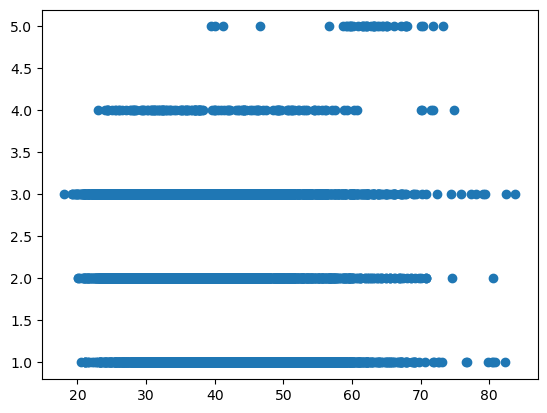

In [9]:
plt.scatter(df['Age'],df['Total Work Experience'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1eedfcd0950>,
 'caps': [<matplotlib.lines.Line2D at 0x1eedfcd37d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1eedfa7f010>],
 'medians': [<matplotlib.lines.Line2D at 0x1eedfce4f50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1eedfce5f90>],
 'means': []}

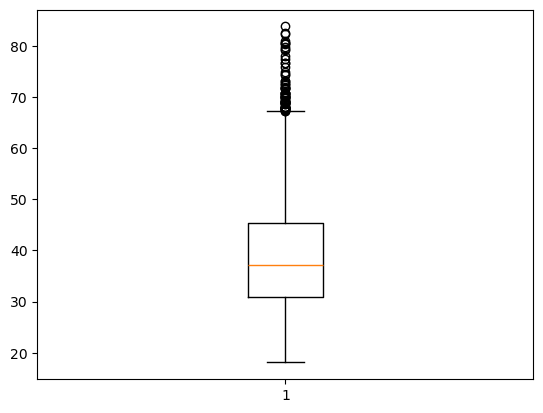

In [10]:
plt.boxplot(df['Age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1eedfc11510>,
 'caps': [<matplotlib.lines.Line2D at 0x1eedfc11890>,
 'boxes': [<matplotlib.lines.Line2D at 0x1eedfc135d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1eedfb9e190>],
 'fliers': [<matplotlib.lines.Line2D at 0x1eedfb9d210>],
 'means': []}

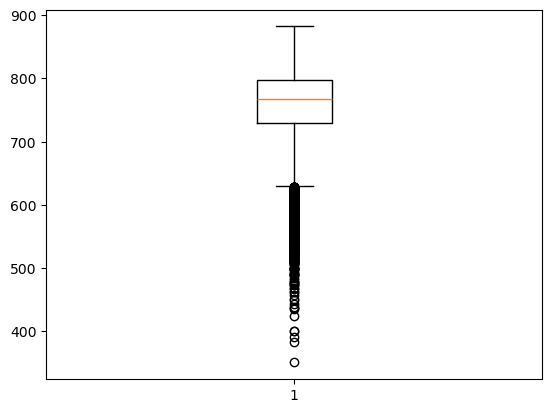

In [11]:
plt.boxplot(df['Cibil score'])

In [12]:
X = df.drop('Total bounces past12months',axis=1)
y = df['Total bounces past12months']

In [13]:
X


,Age,Total Work Experience,Number of years in city,Cost to Request Ratio,Cibil score,Overdrafts past12months
0,40.50,2,6,0.842666,594,0
1,41.25,5,2,0.791667,754,0
2,39.50,5,2,0.727273,779,0
3,35.00,1,4,0.820232,818,0
4,34.00,3,3,0.455581,853,0
...,...,...,...,...,...,...
8990,30.80,3,3,0.596748,763,0
8991,31.83,3,6,0.986793,532,0
8992,32.67,2,5,0.628330,590,0
8993,37.00,3,3,0.797193,812,0


In [14]:
y

0       0
1       0
2       0
3       0
4       1
       ..
8990    0
8991    0
8992    0
8993    0
8994    0
Name: Total bounces past12months, Length: 8995, dtype: int64

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
clf = KNeighborsClassifier()
clf.fit(X_train,y_train)

KNeighborsClassifier()

In [18]:
clf.score(X_test,y_test)

0.6353529738743746

In [19]:
clf.score(X_train,y_train)

0.6791272929405225

In [20]:
y_pred = clf.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [23]:
accuracy_score(y_test,y_pred)

0.6353529738743746

In [24]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):

    model = KNeighborsClassifier(i)
    model.fit(X_train,y_train)
    
    train_scores.append(model.score(X_train,y_train))
    test_scores.append(model.score(X_test,y_test))

In [28]:
import seaborn as sns
plt.figure(figsize=(12,5))
p = sns.Lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.Line(range(1,15),test_scores,marker='o',label='Test Score')

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

<Figure size 1200x500 with 0 Axes>